For the ticker, read 100-200 raw tweets and create summary statistics, including:
 * a. Mean, standard deviation, median, min and max for
   * i. Total number of unique tweets per day
   * ii. Total number of unique users per day
   * iii. Length of each tweet (either number of words or number of characters)
 * b. Histograms for
   * i. Number of tweets/users
     * 1. By hour of day
     * 2. By day of week
     * 3. By month of year
   * ii. Number of bull/bear sentiment tags
     * 1. By hour of day
     * 2. By day of week
     * 3. By month of year
   * iii. Number of times popular words (eg scam or buy) are used
     * 1. By hour of day
     * 2. By day of week
     * 3. By month of year

In [20]:
import pandas as pd
import numpy as np
import nltk
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [21]:
from text_cleaner import TextCleaner

In [22]:
cleaner = TextCleaner()

[nltk_data] Downloading package punkt to /Users/anshulrao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshulrao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshulrao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
sns.set_theme(style="darkgrid")

In [24]:
df = pd.read_csv("../data/NFLX.csv.gz")

In [25]:
df.head()

,created_at,user_name,user_id,bear_bull_tag,text,message_id
0,2022-01-25 02:17:32+00:00,nightwatchman99,1635725,Bullish,$NFLX shhh,429999796
1,2022-01-25 02:13:48+00:00,OptionsPlayers,619769,NIL,$AMD $NVDA $NFLX Print and Post this in your t...,429999027
2,2022-01-25 02:05:04+00:00,LucidDreamer,4651936,Bullish,$NFLX $400 weekly calls up over 70% already. H...,429997295
3,2022-01-25 02:03:08+00:00,Christmas_is_my_favorit7,4346156,NIL,$NFLX mark this post. We see 350 again. I&#39...,429996910
4,2022-01-25 02:02:51+00:00,Marlin2008,3168679,NIL,$NFLX 350 I’m loading the boat. Will see if it...,429996849


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482766 entries, 0 to 482765
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   created_at     482766 non-null  object
 1   user_name      482766 non-null  object
 2   user_id        482766 non-null  int64 
 3   bear_bull_tag  482766 non-null  object
 4   text           482766 non-null  object
 5   message_id     482766 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 22.1+ MB


In [27]:
df.dtypes

created_at       object
user_name        object
user_id           int64
bear_bull_tag    object
text             object
message_id        int64
dtype: object

In [28]:
# add date column from time.
df['date'] =  pd.to_datetime(df['created_at']).dt.strftime('%Y%m%d')

In [29]:
# clean the tweets
df['text'] = df.apply(lambda r: cleaner.clean_text(r.text), axis=1)

In [30]:
df = df[df['text'] != ""]

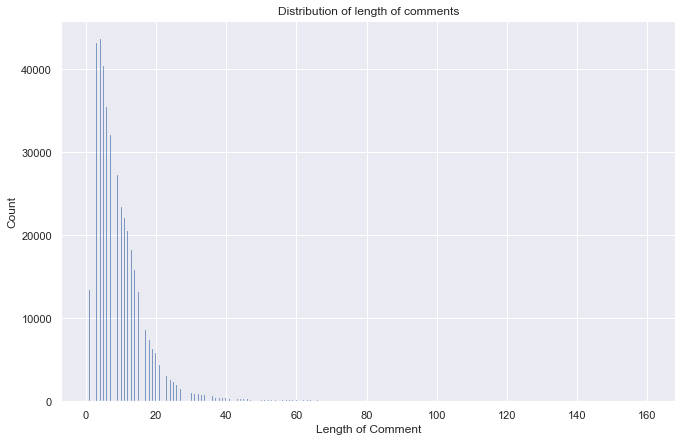

In [31]:
df['txt_length'] = df.apply(lambda r: len(r.text.split()), axis=1)
plt.figure(figsize=(11,7))
ax = sns.histplot(df, x="txt_length")
ax.set(title="Distribution of length of comments", xlabel="Length of Comment");

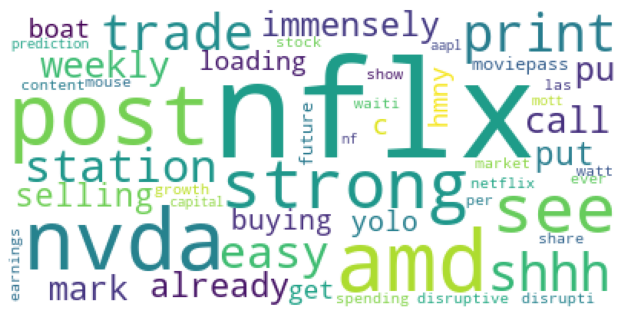

In [32]:
wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'), 
                      max_words=50, background_color="white").generate(str(df.text))
plt.figure(figsize=(11,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
len(df)

482608

In [34]:
# Drop duplicate tweets.
df.drop_duplicates(subset='text', keep="last", inplace=True)

In [35]:
len(df)

412048

In [36]:
g = df.groupby('date')

### a. Mean, Standard Deviation, Median, Min and Max

#### i. Total number of unique tweets per day

In [37]:
g.nunique().text.agg(['mean', 'std', 'median', 'min', 'max'])

mean        243.383343
std         495.301113
median      130.000000
min           5.000000
max       10546.000000
Name: text, dtype: float64

#### ii. Total number of unique users per day

In [38]:
g.nunique().user_id.agg(['mean', 'std', 'median', 'min', 'max'])

mean       129.718842
std        225.819106
median      84.000000
min          5.000000
max       4934.000000
Name: user_id, dtype: float64

#### iii. Length of each tweet (either number of words or number of characters)

In [39]:
df.txt_length.agg(['mean', 'std', 'median', 'min', 'max'])

mean       10.592407
std         9.455253
median      8.000000
min         1.000000
max       160.000000
Name: txt_length, dtype: float64

In [40]:
df['day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name()

In [41]:
df['hour_of_day'] = pd.to_datetime(df['created_at']).dt.hour

In [42]:
df['month_of_year'] = pd.to_datetime(df['created_at']).dt.month

In [43]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

### Wordcloud for weekend tweets

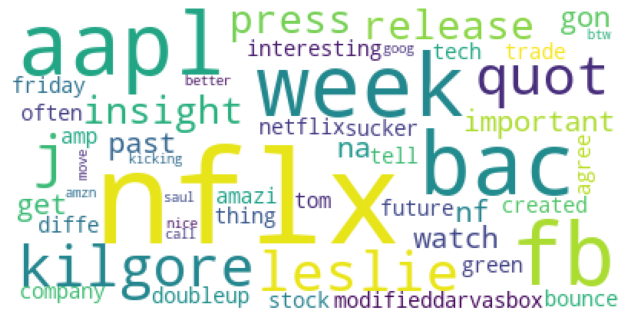

In [44]:
weekend = ["Saturday", "Sunday"]
wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'), 
                      max_words=50, background_color="white").generate(
                          str(df[df['day_of_week'].isin(weekend)].text))
plt.figure(figsize=(11,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Wordcloud for weekday tweets

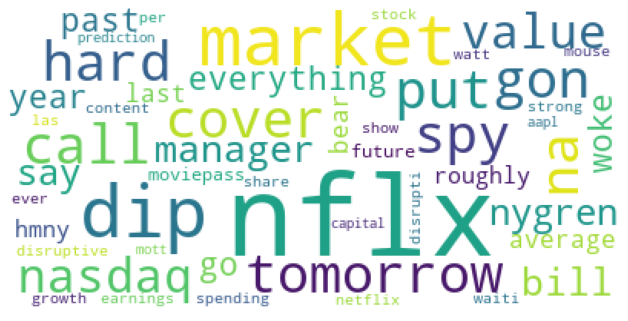

In [45]:
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
wordcloud = WordCloud(stopwords=nltk.corpus.stopwords.words('english'), 
                      max_words=50, background_color="white").generate(
                          str(df[df['day_of_week'].isin(weekday)].text))
plt.figure(figsize=(11,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### b. Histograms

#### i. Number of tweets/users

##### 1. By day of week

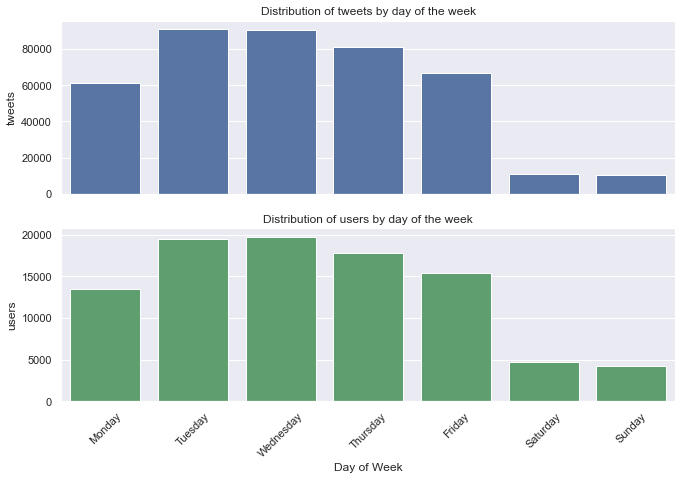

In [46]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(11,7));
sns.countplot(ax=ax[0], data=df, x="day_of_week", order=day_order, color='b');
ax[0].set(title="Distribution of tweets by day of the week", xlabel=None, ylabel="tweets");
g = df.groupby('day_of_week');
tmp_df = g.nunique();
sns.barplot(ax=ax[1], data=tmp_df, x=tmp_df.index, y='user_id', color='g', order=day_order);
ax[1].set(title="Distribution of users by day of the week", xlabel="Day of Week", ylabel="users");
plt.xticks(rotation=45);

##### 2. By hour of day

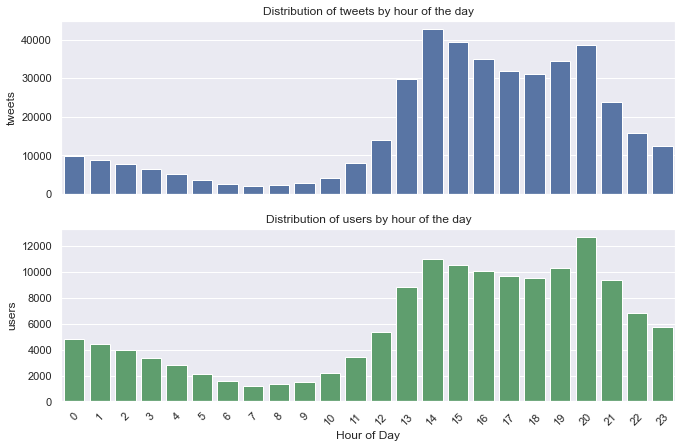

In [47]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(11,7));
sns.countplot(ax=ax[0], data=df, x="hour_of_day", color='b')
ax[0].set(title="Distribution of tweets by hour of the day", xlabel=None, ylabel="tweets")
g = df.groupby('hour_of_day')
tmp_df = g.nunique()
sns.barplot(ax=ax[1], data=tmp_df, x=tmp_df.index, y='user_id', color='g')
ax[1].set(title="Distribution of users by hour of the day", xlabel="Hour of Day", ylabel="users")
plt.xticks(list(range(24)), rotation=45);

##### 3. By month of year

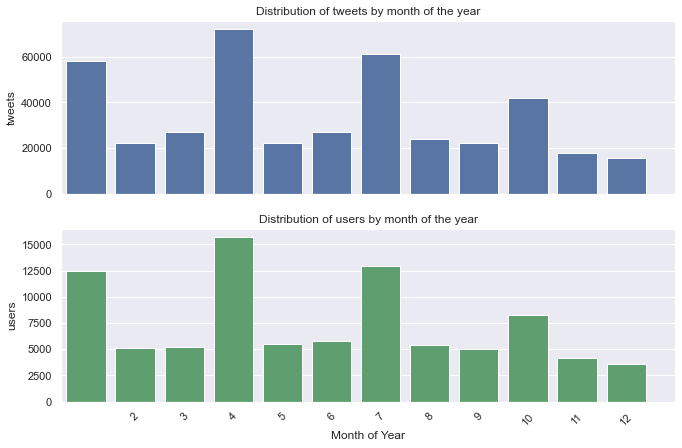

In [48]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(11,7));
sns.countplot(ax=ax[0], data=df, x="month_of_year", color='b')
ax[0].set(title="Distribution of tweets by month of the year", xlabel=None, ylabel="tweets")
g = df.groupby('month_of_year')
tmp_df = g.nunique()
sns.barplot(ax=ax[1], data=tmp_df, x=tmp_df.index, y='user_id', color='g')
ax[1].set(title="Distribution of users by month of the year", xlabel="Month of Year", ylabel="users")
plt.xticks(list(range(1, 13)), rotation=45);